- ## 요약
    1. Train/dev/test set
    2. bias and variance
    3. Regularization
        1. L1, L2
        2. Dropout
        3. Early stopping
        4. Data Augmentation
        5. Input Data Regularization
    4. 기울기 소실/폭주
        - 가중치 초기화
            1. He 초기화
            2. Xavier 초기화
    5. Gradient checking
    6. mini-batch gradient descent
    7. Exponentially weighted average
        1. bias correction
    8. Gradient descent with momentum
    9. RMSprop
    10. Adam
    11. learning rate decay
    12. 지역해/안장점/정체구간


- ## 딥러닝 훈련 과정
    - 딥러닝 훈련 과정은 신경망을 설계하고, 적절한 하이퍼파라미터, 훈련 데이터셋 비율 등을 반복적인 훈련을 통해 찾아가는 과정으로 이루어져 있음
    
    - Train/dex/test set
        - Train set 는 신경망을 훈련하는 데에 사용된다
        - Dev set(Validation set)는 학습된 모델이 새로운 데이터에 대해 얼마나 잘 작동하는지 평가하는데에 사용됨
            - 과적합 여부, 성능의 최고점에 도달했는지 판단함
        - Test set는 모델의 최종성능을 평가하는 데이터셋임

        - 일반적으론 6/2/2 로 나누어 사용함
        - 다만 데이터셋이 매우 클 경우 더 낮은 비율의 검증, 테스트 세트를 이용해도 됨
        - Dex/Test set은 동일한 데이터 분포에서 추출해야함
        - test set 없어도 괜찮을 수 있음, 이때 dev set를 test set로써 사용됨

- ## bias and variance
    - 높은 bias은 과소적합을 유발할수 있고, 높은 variance은 과적합을 야기할수 있음.
    - dev set 의 정확도를 참고해 신경망이 과소,과대적합인지 가늠할것

    - 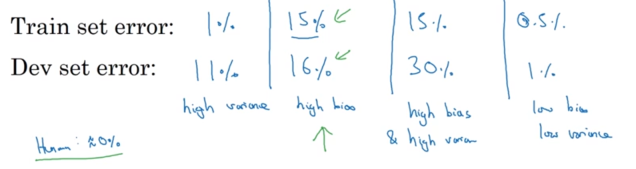


- ## 기본 레시피
    - 높은 편향
        - 신경망 크기 키우기
        - 훈련 시간 늘리기
    - 높은 분산
        - 데이터 늘리기
        - 정규화

- ## 정규화
    - $ J(\omega, b) = \frac{1}{m} \sum_{i=1}^{m} L(\hat{y}^{(i)}, y^{(i)}) + \frac{\lambda}{2m} ||\omega||_2^2 $

        - $\frac{\lambda}{2m} ||\omega||_2^2 $

            - $L2$정규화 식임   
            - 기존 식에 정규화 식을 더함
    - 종류
        - 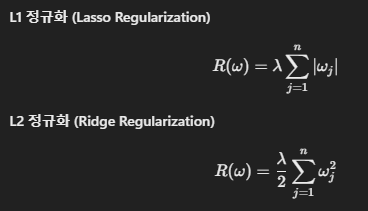

        - 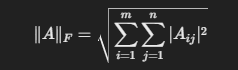
            - 프로비니우스 노름

        - 여기서 람다는 하이퍼파라미터임
            - 파이선 람다와 충돌하기때문에 lambd 로 사용

        - 정규화 후 경사하강법
            - L2 정규화
                - $ dW^{[l]} = (\text{from backprop}) + \frac{\lambda}{m} W^{[l]} $

                    $ W^{[l]} := W^{[l]} - \alpha dW^{[l]} $
                - 기존 경사하강법 항에 정규화의 미분값을 추가항으로 더함
                - 그 외의 식은 동일함
                - 가중치 감소라고도 불림

            - 해당 정규화의 미분값을 편미분값에 더하면 됨

    - 정규화가 과적합을 막는 이유
        - 가중치가 0에 가까운 신경망을 최소화해 신경망의 표현력을 늘림
        - 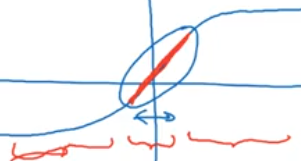
        - 활성화 함수를 작은 영역으로 한정시킴으로써 어느정도 선형적으로 변환함-> 분산감소




    
    - ### 드롭 아웃 정규화
        - 학습 과정에서 뉴런들을 랜덤하게 비활성화함
        - 특정 뉴런 의존도 낮춰 일반화 성능향상

        - 과정
            1. 레이어에서 p의 확률만큼 뉴런을 보존하고 나머지는 비활성화시킨다
            2. 레이어의 output 값은 유지돼도록 유지된 뉴런을 p로 나눠 보정한다.


        - 신경망 테스트 시에는 드롭아웃 하지않음(노이즈만 증가함)


    - ### 데이터 증강
        - 데이터에 증강(변형)을 가해 훈련세트에 포함시킴으로써 훈련 데이터를 늘릴수 있음
        - 완전히 새로운 데이터에 비하면 좋지는 않으나 훈련에 도움이 됨.

    - ### Early stopping
        - 신경망이 과적합되기 이전에 훈련을 중단하는 것임
        - 비용함수를 최적화 하는 과정과 오버피팅 방지를 동시에 하는 문제점이 있음
            - 비용함수 최적화가 덜된건지 오버피팅이 된건지 알수없는 단점이있나?
        
- ### 입력 데이터 정규화
    - 학습을 안정적으로 하고 일반화 성능을 늘리기 위해 함
    - Z-Score 정규화
        - 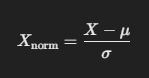
        - 입력데이터를 표준 정규 분포로 만듬
        - 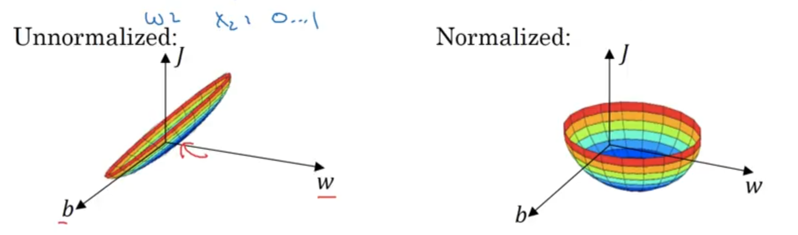
            - 정규화를 거치지 않을 시 비용함수는 그림과 같이 찌그러진 형태를 띄게 되며, 학습속도가 느려지게 됨
            - 정규화를 통해 구 모향으로 변환하여 안정적인 학습속도를 기대할 수 있음

- ## 기울기 소실,폭주
    - 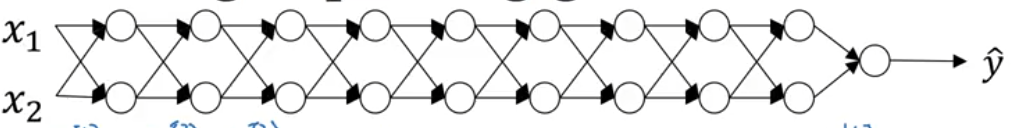
    - 신경망 학습은 가중치의 연쇄적인 곱의 형태로 있기 때문에 매우 많은 은닉층을 가질시 기울기 소실, 폭주 문제가 발생할 수 있음
    - 가중치가 1보다 작으면 소실, 1보다 크면 폭주가 일어남

    - 해결법
        1. 가중치 초기화
            - 기울기가 폭주, 소실하지 않는 적절한 기울기를 설정함
            - 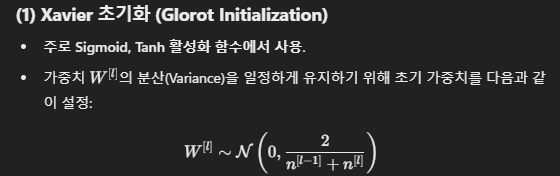
            - 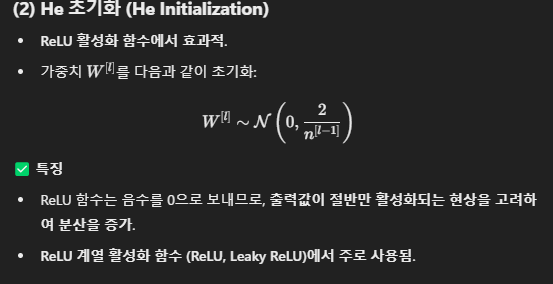
            - 초기 가중치에 분산 제곱근 곱해서 수치 조절함

- ## Gradient checking
    - 알고리즘 검증 방법임
    - 디버깅에서 사용할 것(학습시에 사용하지 말 것)
    - 실패 시 가까운 컴포넌트부터 체크할 것
    - 정규화 잊지 말것
    - 드롭아웃 시 사용할수 없으니 드롭아웃 끄고 체크할것
    - 
    1. 가중치를 미분한다
    2. 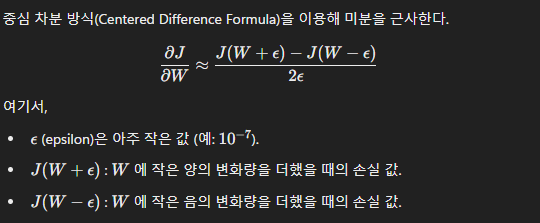
    3. 1과 2의 차이를 계산한다
        - 이 때 앱실론은 0.01 같은 작은 값을 설정한다.
        - 원칙적인 방법은 앱실론을 무한으로 근사해야하나 그럴필요까진 없다


    - 신경망에서의 Gradient checking
        1. 신경망의 모든 가중치, 편향을 concatenate(이어붙이기) 하여 커다란 벡터 $\theta$ 로 합침
        2. 미분값을 구해 $d\theta$ 로 변형함
        3. 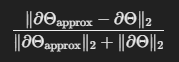 L2 노름 비교함
            - $ \frac{\partial \Theta_{\text{approx}}[i]}{\partial \Theta[i]} \approx \frac{J(\Theta_1, \Theta_2, ..., \Theta_i + \epsilon, ...) - J(\Theta_1, \Theta_2, ..., \Theta_i - \epsilon, ...)}{2\epsilon} $ 각각의 i에 대해 근사된 미분값을 비교해야함
        4. $\epsilon = 10^{-7}$ 에서 식이 $10^{-7}$ 보다 작다면 문제없음

- ## mini-batch gradient descent
    - 벡터화는 m개의 훈련셋을 효율적으로 학습하는 데 도움이 됨
    - 단, m 이 클경우 mini-batch 단위로 잘라서 사용해야 함
        - $ \text{Mini-batch } t: \quad X^{\{t\}}, Y^{\{t\}} $

    - 수식 변화
        - 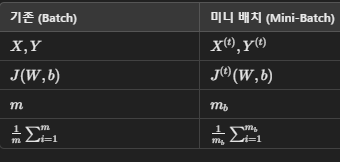
        - 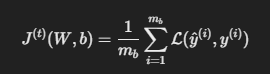

        - 강의내용은 중괄호, gpt는 소괄호라 함 확인할것
    
    - 학습 시 비용 함수가 진동하게 되며, 이는 미니 배치 간 분포가 다르기 때문에 발생하는 현상임

    - 수식 형태
        - mini-batch = m    : $ (X^{(t)}, Y^{(t)}) = (X, Y). $
            - 미니 배치 반복이 한번만 발생하므로 대체되고 끝남
        - mini-batch = 1    : Stochastic gradient descent 사용
            - 진동 강도가 높기 떄문에 확률적 경사 하강 사용함
        - 실전에선 과하게 크진 않은 값으로 사용

    - 가이드
        - 작은 훈련셋에선 배치 경사하강 사용
        - $2^n$ 값의 배치 사이즈 사용
        - cpu/gpu 메모리 제한에 맞는 배치 사이즈 사용함
        


- ## 지수 가중 이동 평균(Exponentially Weighted Averages)
    - 일반적인 이동 평균과는 다르게 최근 데이터에 다른 가중치를 부여하는 평균임
    - $ v_t = \beta v_{t-1} + (1 - \beta) \theta_t $
        - $\beta$ 는 사용자가 설정하는 값
        - $\beta$ 가 클수록 과거 데이터에 높은 가중치 부여
        - $\beta$ 가 낮을수록 최근 데이터 $\theta_t$ 에 높은 가중치 부여
        - 오래된 값은 가중치가 $\beta$, $\beta^2$, $\beta^3$, $\beta^n$... 식으로 점점 작아짐
            - 식을 풀어보면 알수 있음

    - 참고사항
        - $ 0.9^{10} \approx 0.35 \approx \frac{1}{e} $
        - $ 0.98^{50} \approx \frac{1}{e} $



    - ### bias correction
        - 지수 가중 이동평균을 적용시키면 초기 데이터는 매우 낮은 편향된 모양을 띔
        - 이에 대한 보정을 위해 추가적인 연산이 필요함
        - 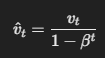
            - 기존식에서 $1-\beta^t$ 로 나눈 것
            - 초기는 분모가 큰 값을 가지게 됨
            - $\infty$ 로 발산함에 따라 분모는 1이 됨

            


- ## 모멘텀 가진 경사하강법
    - 물리학의 관성을 경사 하강법에 적용한 방법임
    - $dw, db$ 에 가중 이동평균을 적용하고, 대체한다.
    - $ v_{dw} = \beta v_{dw} + (1 - \beta) \, dW $

    - $ v_{db} = \beta v_{db} + (1 - \beta) \, db $

    - $ v_{dw} = \beta v_{dw} + dW $
        - 뒤의 $1-\beta$ 를 생략하고 사용하기도 함
    - 하이퍼파라미터
        - $\alpha$
            - 학습률
        - $\beta$
            - 모멘텀 계수
            - 일반적으로 0.9 사용


- ## RMSprop
    - $W$에 대한 기울기의 변화량을 추적해서, 학습률을 조절함
    - 과정  
        1. 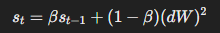
            - 편미분의 제곱 값 하이퍼파라미터 $\beta$ 에 따라 계산함
            - $ S_{dw} = \beta S_{dw} + (1 - \beta) dW^2 $

            - $ S_{db} = \beta S_{db} + (1 - \beta) db^2 $
            - 가중치와 편향에 대해 따로 계산함
        2. 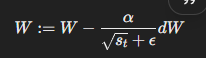
            - 구한 $s_t$ 값의 제곱근을 매우 작은 값 $\epsilon$ 과 더해서 나눔
            
    - $dW$ 를 대체하는 모멘텀과는 다르게 학습률에 추가 식을 나눠서 값을 조정함
    - 작은 값에 대해 수치안정성을 제공하는 $\epsilon$ 은 $10^{-7}\sim10^{-8}$ 의 값을 사용한다

- ## Adam
    - 모멘텀과 RMSprop을 결합한 알고리즘임
    - $dW$ 는 가중 이동평균을 적용해서 새로운 $dW$ 로 대체
        - 대체된 $dW$ 에 편향보정을 적용함
    - 학습률은 $s_t+\epsilon$ 으로 나누어서 조정함
        - 이 떄 $s_t$ 에도 가중 이동평균에 사용하는 편향보정이 들어감

    - 최종 식
        - 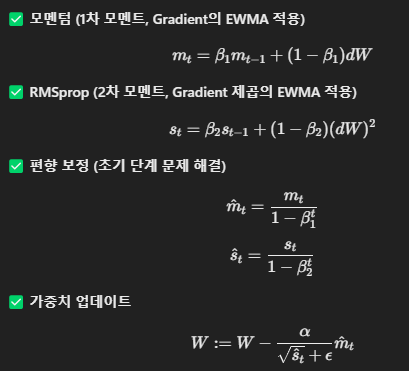

    - 하이퍼파라미터
        - $\alpha$
            - 기본 학습률
        - $\beta_1$
            - 가중 이동평균(모멘텀) 에 대한 베타값
            - 0.9 추천
        - $\beta_2$
            - 가중 이동평균(RMSprop) 에 대한 베타값
            - 0.999 추천
        - $\epsilon$
            - $10^8$ 쓰셈
            - 굳이 안건듬
            

- ## Learning Rate Decay
    - 학습이 진행되며 수렴함에 따라 높은 학습률이 필요하지 않음
    - 초기에는 높은 학습률을 사용해 빠르게 학습시키고, 점차 감소시키며 수렴시키는 방법임
    
    - 방법
        1. Step Decay
            - 일정 에포크마다 학습률 일정 비율 감소
            - 
        2. Exponential Decay
            - 매 반복마다 지수적으로 감소
            - 
        - $\lambda$ 감소율
        - $t$ 에포크 수
        

- ## 신경망의 지역해
    - 다차원적인 신경망에서 모든 방향으로 비용 함수가 증가하는 지점인 지역해가 나타날 가능성은 매우 낮음
    - 조심해야할것은 안장점과 기울기가 0인 상태가 오래 유지되는 정체구간임
    - Adam 이 해당 지점에 대해 도움이 됨